In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics as st
from datetime import datetime 

In [8]:
data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
display(data)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,1,1,1,2,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,2,4,5,5,6,8,10
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9,11,15,17,17,19,21,25,26,29
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,1,1,1,1,3,3,3
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


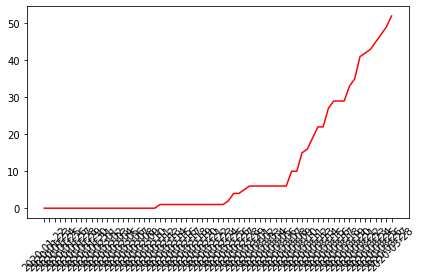

In [9]:
japan = data[data["Country/Region"] == "Japan"]
#display(japan)
time_ser = japan.iloc[:,4:]
#display(list(time_ser.iloc[0]))
fig, ax = plt.subplots()
fig.canvas.draw()
col = time_ser.iloc[0]
dates=list(time_ser)
date_object = datetime.strptime(dates[0], '%m/%d/%y')
x_values = [datetime.strptime(str(d),"%m/%d/%y").date() for d in dates]

plt.plot(dates, col, c = "red")

ax.set_xticklabels(x_values, rotation=45)
plt.tight_layout()

plt.show()


In [12]:
da = pd.read_csv("csse_covid_19_data/csse_covid_19_daily_reports/03-28-2020.csv")
au = da[da["Country_Region"] == "Australia"]
display(au)
T_R=sum(list(da["Recovered"]))
T_D=sum(list(da["Deaths"]))
T_C=sum(list(da["Confirmed"]))
AU_R=sum(list(au["Recovered"]))
AU_D=sum(list(au["Deaths"]))
AU_C=sum(list(au["Confirmed"]))
print("Confirmed in AU: ",sum(list(au["Confirmed"])))
print("Recovered in AU: ",sum(list(au["Recovered"])))
print("Deaths in AU:    ",sum(list(au["Deaths"])))
print("Total Confirmed: ",sum(list(da["Confirmed"])))
print("Total Recovered: ",sum(list(da["Recovered"])))
print("Total Deaths:    ",sum(list(da["Deaths"])))
print("Total Active:    ",sum(list(da["Active"])))
print("Recover Rate:    ",np.round(T_R*100/T_C,3),"%")
print("Deaths Rate:     ",np.round(T_D*100/T_C,3),"%")
print("AU Recover Rate: ",np.round(AU_R*100/AU_C,3),"%")
print("AU Deaths Rate:  ",np.round(AU_D*100/AU_C,3),"%")        

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
3175,NaN,NaN,Australian Capital Territory,Australia,2020-03-28 23:11:06,-35.4735,149.0124,71,0,2,69,"Australian Capital Territory, Australia"
3220,NaN,NaN,New South Wales,Australia,2020-03-28 23:11:06,-33.8688,151.2093,1617,8,4,1605,"New South Wales, Australia"
3224,NaN,NaN,Northern Territory,Australia,2020-03-28 23:11:06,-12.4634,130.8456,15,0,0,15,"Northern Territory, Australia"
3232,NaN,NaN,Queensland,Australia,2020-03-28 23:11:06,-27.4698,153.0251,625,1,8,616,"Queensland, Australia"
3244,NaN,NaN,South Australia,Australia,2020-03-28 23:11:06,-34.9285,138.6007,287,0,6,281,"South Australia, Australia"
3246,NaN,NaN,Tasmania,Australia,2020-03-28 23:11:06,-42.8821,147.3272,62,0,5,57,"Tasmania, Australia"
3250,NaN,NaN,Victoria,Australia,2020-03-28 23:11:06,-37.8136,144.9631,685,3,191,491,"Victoria, Australia"
3252,NaN,NaN,Western Australia,Australia,2020-03-28 23:11:06,-31.9505,115.8605,278,2,28,248,"Western Australia, Australia"


Confirmed in AU:  3640
Recovered in AU:  244
Deaths in AU:     14
Total Confirmed:  660706
Total Recovered:  139415
Total Deaths:     30652
Total Active:     367210
Recover Rate:     21.101 %
Deaths Rate:      4.639 %
AU Recover Rate:  6.703 %
AU Deaths Rate:   0.385 %
